## Description

The ideia is to analyse the data from all the years of Formula 1 and define the Champion of all times. Will be used a database from 1950 to 2022, but the scorting system will be from the year 2022, as listed below:

1. 25 points;
2. 18 points;
3. 15 points;
4. 12 points;
5. 10 points;
6. 8 points;
7. 6 points;
8. 4 points;
9. 2 points;
10. 1 point.

#### OBS: Fastest lap extra point will not be used.

## Libraries

In [144]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data load

In [145]:
df_drivers = pd.read_csv('drivers.csv', na_values='\\N')
df_teams = pd.read_csv('constructors.csv', na_values='\\N')
df_results = pd.read_csv('results.csv', na_values='\\N')
df_races = pd.read_csv('races.csv', na_values='\\N')

In [126]:
merge_df = pd.merge(df_drivers, df_results, on = 'driverId', how = 'inner')
print(merge_df)

       driverId driverRef  number_x code forename   surname         dob  \
0             1  hamilton      44.0  HAM    Lewis  Hamilton  1985-01-07   
1             1  hamilton      44.0  HAM    Lewis  Hamilton  1985-01-07   
2             1  hamilton      44.0  HAM    Lewis  Hamilton  1985-01-07   
3             1  hamilton      44.0  HAM    Lewis  Hamilton  1985-01-07   
4             1  hamilton      44.0  HAM    Lewis  Hamilton  1985-01-07   
...         ...       ...       ...  ...      ...       ...         ...   
25655       855      zhou      24.0  ZHO   Guanyu      Zhou  1999-05-30   
25656       855      zhou      24.0  ZHO   Guanyu      Zhou  1999-05-30   
25657       855      zhou      24.0  ZHO   Guanyu      Zhou  1999-05-30   
25658       855      zhou      24.0  ZHO   Guanyu      Zhou  1999-05-30   
25659       855      zhou      24.0  ZHO   Guanyu      Zhou  1999-05-30   

      nationality                                          url  resultId  ...  \
0         British 

In [167]:
merge2_df = pd.merge(df_teams, df_results, on = 'constructorId', how = 'inner')
print(merge2_df)

       constructorId constructorRef            name nationality  \
0                  1        mclaren         McLaren     British   
1                  1        mclaren         McLaren     British   
2                  1        mclaren         McLaren     British   
3                  1        mclaren         McLaren     British   
4                  1        mclaren         McLaren     British   
...              ...            ...             ...         ...   
25655            214         alpine  Alpine F1 Team      French   
25656            214         alpine  Alpine F1 Team      French   
25657            214         alpine  Alpine F1 Team      French   
25658            214         alpine  Alpine F1 Team      French   
25659            214         alpine  Alpine F1 Team      French   

                                               url  resultId  raceId  \
0             http://en.wikipedia.org/wiki/McLaren         1      18   
1             http://en.wikipedia.org/wiki/McLaren 

In [127]:
merge_df.head(n=20)

driverId driverRef  number_x code forename   surname         dob  \
0          1  hamilton      44.0  HAM    Lewis  Hamilton  1985-01-07   
1          1  hamilton      44.0  HAM    Lewis  Hamilton  1985-01-07   
2          1  hamilton      44.0  HAM    Lewis  Hamilton  1985-01-07   
3          1  hamilton      44.0  HAM    Lewis  Hamilton  1985-01-07   
4          1  hamilton      44.0  HAM    Lewis  Hamilton  1985-01-07   
5          1  hamilton      44.0  HAM    Lewis  Hamilton  1985-01-07   
6          1  hamilton      44.0  HAM    Lewis  Hamilton  1985-01-07   
7          1  hamilton      44.0  HAM    Lewis  Hamilton  1985-01-07   
8          1  hamilton      44.0  HAM    Lewis  Hamilton  1985-01-07   
9          1  hamilton      44.0  HAM    Lewis  Hamilton  1985-01-07   
10         1  hamilton      44.0  HAM    Lewis  Hamilton  1985-01-07   
11         1  hamilton      44.0  HAM    Lewis  Hamilton  1985-01-07   
12         1  hamilton      44.0  HAM    Lewis  Hamilton  1985-01-07   
13         1  hamilton      44.0  HAM    Lewis  Hamilton  1985-01-07   
14         1  hamilton      44.0  HAM    Lewis  Hamilton  1985-01-07   
15         1  hamilton      44.0  HAM    Lewis  Hamilton  1985-01-07   
16         1  hamilton      44.0  HAM    Lewis  Hamilton  1985-01-07   
17         1  hamilton      44.0  HAM    Lewis  Hamilton  1985-01-07   
18         1  hamilton      44.0  HAM    Lewis  Hamilton  1985-01-07   
19         1  hamilton      44.0  HAM    Lewis  Hamilton  1985-01-07   

   nationality                                          url  resultId  ...  \
0      British  http://en.wikipedia.org/wiki/Lewis_Hamilton         1  ...   
1      British  http://en.wikipedia.org/wiki/Lewis_Hamilton        27  ...   
2      British  http://en.wikipedia.org/wiki/Lewis_Hamilton        57  ...   
3      British  http://en.wikipedia.org/wiki/Lewis_Hamilton        69  ...   
4      British  http://en.wikipedia.org/wiki/Lewis_Hamilton        90  ...   
5      British  http://en.wikipedia.org/wiki/Lewis_Hamilton       109  ...   
6      British  http://en.wikipedia.org/wiki/Lewis_Hamilton       147  ...   
7      British  http://en.wikipedia.org/wiki/Lewis_Hamilton       158  ...   
8      British  http://en.wikipedia.org/wiki/Lewis_Hamilton       169  ...   
9      British  http://en.wikipedia.org/wiki/Lewis_Hamilton       189  ...   
10     British  http://en.wikipedia.org/wiki/Lewis_Hamilton       213  ...   
11     British  http://en.wikipedia.org/wiki/Lewis_Hamilton       230  ...   
12     British  http://en.wikipedia.org/wiki/Lewis_Hamilton       251  ...   
13     British  http://en.wikipedia.org/wiki/Lewis_Hamilton       275  ...   
14     British  http://en.wikipedia.org/wiki/Lewis_Hamilton       291  ...   
15     British  http://en.wikipedia.org/wiki/Lewis_Hamilton       320  ...   
16     British  http://en.wikipedia.org/wiki/Lewis_Hamilton       329  ...   
17     British  http://en.wikipedia.org/wiki/Lewis_Hamilton       353  ...   
18     British  http://en.wikipedia.org/wiki/Lewis_Hamilton       371  ...   
19     British  http://en.wikipedia.org/wiki/Lewis_Hamilton       392  ...   

    positionOrder  points  laps         time  milliseconds fastestLap  rank  \
0               1    10.0    58  1:34:50.616     5690616.0       39.0   2.0   
1               5     4.0    56      +46.548     5525103.0       53.0   3.0   
2              13     0.0    56          NaN           NaN       25.0  19.0   
3               3     6.0    66       +4.187     5903238.0       20.0   3.0   
4               2     8.0    58       +3.779     5213230.0       31.0   2.0   
5               1    10.0    76  2:00:42.742     7242742.0       71.0   6.0   
6              19     0.0    19          NaN           NaN        4.0   3.0   
7              10     0.0    70      +54.538     5564783.0       40.0   5.0   
8               1    10.0    60  1:39:09.440     5949440.0       16.0   3.0   
9               1    10.0    67  1:31:20.874     5480874.0    

In [129]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25660 entries, 0 to 25659
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   driverId         25660 non-null  int64  
 1   driverRef        25660 non-null  object 
 2   number_x         5403 non-null   float64
 3   code             9079 non-null   object 
 4   forename         25660 non-null  object 
 5   surname          25660 non-null  object 
 6   dob              25660 non-null  object 
 7   nationality      25660 non-null  object 
 8   url              25660 non-null  object 
 9   resultId         25660 non-null  int64  
 10  raceId           25660 non-null  int64  
 11  constructorId    25660 non-null  int64  
 12  number_y         25654 non-null  float64
 13  grid             25660 non-null  int64  
 14  position         14833 non-null  float64
 15  positionText     25660 non-null  object 
 16  positionOrder    25660 non-null  int64  
 17  points      

In [130]:
merge_df.describe()

driverId     number_x      resultId        raceId  constructorId  \
count  25660.000000  5403.000000  25660.000000  25660.000000   25660.000000   
mean     258.558496    25.850824  12831.305105    527.495830      48.299532   
std      265.708300    25.132259   7408.686039    296.776908      59.354624   
min        1.000000     2.000000      1.000000      1.000000       1.000000   
25%       56.000000     8.000000   6415.750000    291.000000       6.000000   
50%      160.000000    18.000000  12830.500000    511.000000      25.000000   
75%      358.000000    31.000000  19245.250000    777.000000      58.000000   
max      855.000000    99.000000  25665.000000   1086.000000     214.000000   

           number_y          grid      position  positionOrder        points  \
count  25654.000000  25660.000000  14833.000000   25660.000000  25660.000000   
mean      17.740742     11.187256      7.929684      12.892673      1.854523   
std       15.042254      7.251983      4.801562       7.721729      4.131527   
min        0.000000      0.000000      1.000000       1.000000      0.000000   
25%        7.000000      5.000000      4.000000       6.000000      0.000000   
50%       15.000000     11.000000      7.000000      12.000000      0.000000   
75%       24.000000     17.000000     11.000000      18.000000      2.000000   
max      208.000000     34.000000     33.000000      39.000000     50.000000   

               laps  milliseconds   fastestLap         rank  fastestLapSpeed  \
count  25660.000000  6.963000e+03  7206.000000  7411.000000      7206.000000   
mean      45.936204  6.225696e+06    42.532612    10.426258       203.083332   
std       29.867844  1.673671e+06    16.838234     6.169824        21.332629   
min        0.000000  2.070710e+05     2.000000     0.000000        89.540000   
25%       22.000000  5.415903e+06    32.000000     5.000000       192.762250   
50%       52.000000  5.808632e+06    45.000000    10.000000       204.291000   
75%       66.000000  6.426908e+06    54.000000    16.000000       216.197750   
max      200.000000  1.509054e+07    85.000000    24.000000       257.320000   

           statusId  
count  25660.000000  
mean      17.634528  
std       26.161012  
min        1.000000  
25%        1.000000  
50%       11.000000  
75%       14.000000  
max      141.000000

In [137]:
points_total = merge_df.groupby('driverRef')[['points']].sum().reset_index()
points_total = points_total.sort_values('points', ascending = False).head(10)
points_total

driverRef  points
341            hamilton  4308.5
805              vettel  3077.0
20               alonso  2021.0
645           raikkonen  1873.0
516      max_verstappen  1792.5
101              bottas  1775.0
682             rosberg  1594.5
535  michael_schumacher  1566.0
666           ricciardo  1289.0
133              button  1235.0

In [138]:
most_laps = merge_df.groupby('driverRef')[['laps']].sum().reset_index()
most_laps = most_laps.sort_values('laps', ascending = False).head(10)
most_laps

driverRef   laps
20               alonso  18741
645           raikkonen  18618
341            hamilton  17216
535  michael_schumacher  16824
54          barrichello  16642
133              button  16274
805              vettel  15958
514               massa  14852
604               perez  12500
178           coulthard  12394

## Data exploration

### Data Visualization

In [146]:
df_drivers.head(n=20)

driverId   driverRef  number code   forename     surname         dob  \
0          1    hamilton    44.0  HAM      Lewis    Hamilton  1985-01-07   
1          2    heidfeld     NaN  HEI       Nick    Heidfeld  1977-05-10   
2          3     rosberg     6.0  ROS       Nico     Rosberg  1985-06-27   
3          4      alonso    14.0  ALO   Fernando      Alonso  1981-07-29   
4          5  kovalainen     NaN  KOV     Heikki  Kovalainen  1981-10-19   
5          6    nakajima     NaN  NAK     Kazuki    Nakajima  1985-01-11   
6          7    bourdais     NaN  BOU  Sébastien    Bourdais  1979-02-28   
7          8   raikkonen     7.0  RAI       Kimi   Räikkönen  1979-10-17   
8          9      kubica    88.0  KUB     Robert      Kubica  1984-12-07   
9         10       glock     NaN  GLO       Timo       Glock  1982-03-18   
10        11        sato     NaN  SAT     Takuma        Sato  1977-01-28   
11        12   piquet_jr     NaN  PIQ     Nelson  Piquet Jr.  1985-07-25   
12        13       massa    19.0  MAS     Felipe       Massa  1981-04-25   
13        14   coulthard     NaN  COU      David   Coulthard  1971-03-27   
14        15      trulli     NaN  TRU      Jarno      Trulli  1974-07-13   
15        16       sutil    99.0  SUT     Adrian       Sutil  1983-01-11   
16        17      webber     NaN  WEB       Mark      Webber  1976-08-27   
17        18      button    22.0  BUT     Jenson      Button  1980-01-19   
18        19    davidson     NaN  DAV    Anthony    Davidson  1979-04-18   
19        20      vettel     5.0  VET  Sebastian      Vettel  1987-07-03   

   nationality                                                url  
0      British        http://en.wikipedia.org/wiki/Lewis_Hamilton  
1       German         http://en.wikipedia.org/wiki/Nick_Heidfeld  
2       German          http://en.wikipedia.org/wiki/Nico_Rosberg  
3      Spanish       http://en.wikipedia.org/wiki/Fernando_Alonso  
4      Finnish     http://en.wikipedia.org/wiki/Heikki_Kovalainen  
5     Japanese       http://en.wikipedia.org/wiki/Kazuki_Nakajima  
6       French  http://en.wikipedia.org/wiki/S%C3%A9bastien_Bo...  
7      Finnish  http://en.wikipedia.org/wiki/Kimi_R%C3%A4ikk%C...  
8       Polish         http://en.wikipedia.org/wiki/Robert_Kubica  
9       German            http://en.wikipedia.org/wiki/Timo_Glock  
10    Japanese           http://en.wikipedia.org/wiki/Takuma_Sato  
11   Brazilian    http://en.wikipedia.org/wiki/Nelson_Piquet,_Jr.  
12   Brazilian          http://en.wikipedia.org/wiki/Felipe_Massa  
13     British       http://en.wikipedia.org/wiki/David_Coulthard  
14     Italian          http://en.wikipedia.org/wiki/Jarno_Trulli  
15      German          http://en.wikipedia.org/wiki/Adrian_Sutil  
16  Australian  http://en.wikipedia.org/wiki/Mark_Webber_(raci...  
17     British         http://en.wikipedia.org/wiki/Jenson_Button  
18     British      http://en.wikipedia.org/wiki/Anthony_Davidson  
19      German      http://en.wikipedia.org/wiki/Sebastian_Vettel

In [147]:
df_teams.head(n=20)

constructorId constructorRef         name nationality  \
0               1        mclaren      McLaren     British   
1               2     bmw_sauber   BMW Sauber      German   
2               3       williams     Williams     British   
3               4        renault      Renault      French   
4               5     toro_rosso   Toro Rosso     Italian   
5               6        ferrari      Ferrari     Italian   
6               7         toyota       Toyota    Japanese   
7               8    super_aguri  Super Aguri    Japanese   
8               9       red_bull     Red Bull    Austrian   
9              10    force_india  Force India      Indian   
10             11          honda        Honda    Japanese   
11             12         spyker       Spyker       Dutch   
12             13            mf1          MF1     Russian   
13             14     spyker_mf1   Spyker MF1       Dutch   
14             15         sauber       Sauber       Swiss   
15             16            bar          BAR     British   
16             17         jordan       Jordan       Irish   
17             18        minardi      Minardi     Italian   
18             19         jaguar       Jaguar     British   
19             20          prost        Prost      French   

                                                  url  
0                http://en.wikipedia.org/wiki/McLaren  
1             http://en.wikipedia.org/wiki/BMW_Sauber  
2   http://en.wikipedia.org/wiki/Williams_Grand_Pr...  
3   http://en.wikipedia.org/wiki/Renault_in_Formul...  
4    http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso  
5       http://en.wikipedia.org/wiki/Scuderia_Ferrari  
6          http://en.wikipedia.org/wiki/Toyota_Racing  
7         http://en.wikipedia.org/wiki/Super_Aguri_F1  
8        http://en.wikipedia.org/wiki/Red_Bull_Racing  
9   http://en.wikipedia.org/wiki/Racing_Point_Forc...  
10       http://en.wikipedia.org/wiki/Honda_Racing_F1  
11             http://en.wikipedia.org/wiki/Spyker_F1  
12     http://en.wikipedia.org/wiki/Midland_F1_Racing  
13     http://en.wikipedia.org/wiki/Midland_F1_Racing  
14                http://en.wikipedia.org/wiki/Sauber  
15  http://en.wikipedia.org/wiki/British_American_...  
16     http://en.wikipedia.org/wiki/Jordan_Grand_Prix  
17               http://en.wikipedia.org/wiki/Minardi  
18         http://en.wikipedia.org/wiki/Jaguar_Racing  
19      http://en.wikipedia.org/wiki/Prost_Grand_Prix

In [7]:
df_races.head(n=20)

raceId  year  round  circuitId                   name        date  \
0        1  2009      1          1  Australian Grand Prix  2009-03-29   
1        2  2009      2          2   Malaysian Grand Prix  2009-04-05   
2        3  2009      3         17     Chinese Grand Prix  2009-04-19   
3        4  2009      4          3     Bahrain Grand Prix  2009-04-26   
4        5  2009      5          4     Spanish Grand Prix  2009-05-10   
5        6  2009      6          6      Monaco Grand Prix  2009-05-24   
6        7  2009      7          5     Turkish Grand Prix  2009-06-07   
7        8  2009      8          9     British Grand Prix  2009-06-21   
8        9  2009      9         20      German Grand Prix  2009-07-12   
9       10  2009     10         11   Hungarian Grand Prix  2009-07-26   
10      11  2009     11         12    European Grand Prix  2009-08-23   
11      12  2009     12         13     Belgian Grand Prix  2009-08-30   
12      13  2009     13         14     Italian Grand Prix  2009-09-13   
13      14  2009     14         15   Singapore Grand Prix  2009-09-27   
14      15  2009     15         22    Japanese Grand Prix  2009-10-04   
15      16  2009     16         18   Brazilian Grand Prix  2009-10-18   
16      17  2009     17         24   Abu Dhabi Grand Prix  2009-11-01   
17      18  2008      1          1  Australian Grand Prix  2008-03-16   
18      19  2008      2          2   Malaysian Grand Prix  2008-03-23   
19      20  2008      3          3     Bahrain Grand Prix  2008-04-06   

        time                                                url fp1_date  \
0   06:00:00  http://en.wikipedia.org/wiki/2009_Australian_G...      NaN   
1   09:00:00  http://en.wikipedia.org/wiki/2009_Malaysian_Gr...      NaN   
2   07:00:00  http://en.wikipedia.org/wiki/2009_Chinese_Gran...      NaN   
3   12:00:00  http://en.wikipedia.org/wiki/2009_Bahrain_Gran...      NaN   
4   12:00:00  http://en.wikipedia.org/wiki/2009_Spanish_Gran...      NaN   
5   12:00:00  http://en.wikipedia.org/wiki/2009_Monaco_Grand...      NaN   
6   12:00:00  http://en.wikipedia.org/wiki/2009_Turkish_Gran...      NaN   
7   12:00:00  http://en.wikipedia.org/wiki/2009_British_Gran...      NaN   
8   12:00:00  http://en.wikipedia.org/wiki/2009_German_Grand...      NaN   
9   12:00:00  http://en.wikipedia.org/wiki/2009_Hungarian_Gr...      NaN   
10  12:00:00  http://en.wikipedia.org/wiki/2009_European_Gra...      NaN   
11  12:00:00  http://en.wikipedia.org/wiki/2009_Belgian_Gran...      NaN   
12  12:00:00  http://en.wikipedia.org/wiki/2009_Italian_Gran...      NaN   
13  12:00:00  http://en.wikipedia.org/wiki/2009_Singapore_Gr...      NaN   
14  05:00:00  http://en.wikipedia.org/wiki/2009_Japanese_Gra...      NaN   
15  16:00:00  http://en.wikipedia.org/wiki/2009_Brazilian_Gr...      NaN   
16  11:00:00  http://en.wikipedia.org/wiki/2009_Abu_Dhabi_Gr...      NaN   
17  04:30:00  http://en.wikipedia.org/wiki/2008_Australian_G...      NaN   
18  07:00:00  http://en.wikipedia.org/wiki/2008_Malaysian_Gr...      NaN   
19  11:30:00  http://en.wikipedia.org/wiki/2008_Bahrain_Gran...      NaN   

   fp1_time fp2_date fp2_time fp3_date fp3_time quali_date quali_time  \
0       NaN      NaN      NaN      NaN      NaN        NaN        NaN   
1       NaN      NaN      NaN      NaN      NaN        NaN        NaN   
2       NaN      NaN      NaN      NaN      NaN        NaN        NaN   
3       NaN      NaN      NaN      NaN      NaN        NaN        NaN   
4       NaN      NaN      NaN      NaN      NaN        NaN        NaN   
5       NaN      NaN      NaN      NaN      NaN        NaN        NaN   
6       NaN      NaN      NaN      NaN      NaN        NaN        NaN   
7       NaN      NaN      NaN      NaN      NaN        NaN        NaN   
8       NaN      NaN      NaN      NaN      NaN        NaN        NaN   
9       NaN      NaN      NaN      NaN      NaN        NaN        NaN   
10      NaN      NaN      NaN      NaN      NaN        NaN        NaN 

In [148]:
df_results.head(n=20)

resultId  raceId  driverId  constructorId  number  grid  position  \
0          1      18         1              1    22.0     1       1.0   
1          2      18         2              2     3.0     5       2.0   
2          3      18         3              3     7.0     7       3.0   
3          4      18         4              4     5.0    11       4.0   
4          5      18         5              1    23.0     3       5.0   
5          6      18         6              3     8.0    13       6.0   
6          7      18         7              5    14.0    17       7.0   
7          8      18         8              6     1.0    15       8.0   
8          9      18         9              2     4.0     2       NaN   
9         10      18        10              7    12.0    18       NaN   
10        11      18        11              8    18.0    19       NaN   
11        12      18        12              4     6.0    20       NaN   
12        13      18        13              6     2.0     4       NaN   
13        14      18        14              9     9.0     8       NaN   
14        15      18        15              7    11.0     6       NaN   
15        16      18        16             10    20.0    22       NaN   
16        17      18        17              9    10.0    14       NaN   
17        18      18        18             11    16.0    12       NaN   
18        19      18        19              8    19.0    21       NaN   
19        20      18        20              5    15.0     9       NaN   

   positionText  positionOrder  points  laps         time  milliseconds  \
0             1              1    10.0    58  1:34:50.616     5690616.0   
1             2              2     8.0    58       +5.478     5696094.0   
2             3              3     6.0    58       +8.163     5698779.0   
3             4              4     5.0    58      +17.181     5707797.0   
4             5              5     4.0    58      +18.014     5708630.0   
5             6              6     3.0    57          NaN           NaN   
6             7              7     2.0    55          NaN           NaN   
7             8              8     1.0    53          NaN           NaN   
8             R              9     0.0    47          NaN           NaN   
9             R             10     0.0    43          NaN           NaN   
10            R             11     0.0    32          NaN           NaN   
11            R             12     0.0    30          NaN           NaN   
12            R             13     0.0    29          NaN           NaN   
13            R             14     0.0    25          NaN           NaN   
14            R             15     0.0    19          NaN           NaN   
15            R             16     0.0     8          NaN           NaN   
16            R             17     0.0     0          NaN           NaN   
17            R             18     0.0     0          NaN           NaN   
18            R             19     0.0     0          NaN           NaN   
19            R             20     0.0     0          NaN           NaN   

    fastestLap  rank fastestLapTime  fastestLapSpeed  statusId  
0         39.0   2.0       1:27.452          218.300         1  
1         41.0   3.0       1:27.739          217.586         1  
2         41.0   5.0       1:28.090          216.719         1  
3         58.0   7.0       1:28.603          215.464         1  
4         43.0   1.0       1:27.418          218.385         1  
5         50.0  14.0       1:29.639          212.974        11  
6         22.0  12.0       1:29.534          213.224         5  
7         20.0   4.0       1:27.903          217.180         5  
8         15.0   9.0       1:28.753          215.100         4  
9         23.0  13.0       1:29.558          213.166         3  
10        24.0  15.0       1:30.892          210.038         7  
11        20.0  16.0       1:31.384          208.907         8  
12        23.0   6.0       1:28.175          216.

## Data processing

In [149]:
# Geração dos data frames apenas com as colunas e dados que interessa.
col_list_drivers = ['driverId','forename','surname','code']
df_drivers_cl = df_drivers.filter(col_list_drivers, axis=1)

col_list_teams = ['constructorId','name']
df_teams_cl = df_teams.filter(col_list_teams, axis=1)

col_list_races = ['raceId','year','round']
df_races_cl = df_races.filter(col_list_races, axis=1) 

#Além de selecionar as colunas que fazem sentido para a analise, selecionado apenas as linhas em que o piloto ficou entre as 10 primeiras colocações.
col_list_results = ['raceId','driverId','constructorId','position',]
df_results_cl = df_results[df_results['position'] < 11].filter(col_list_results, axis=1)

In [150]:
#Verificação dos data frames criados anteriormente
print('Drivers')
print(df_drivers_cl.head(n=5))
print('')
print('Teams')
print(df_teams_cl.head(n=5))
print('')
print('Races')
print(df_races_cl.head(n=5))
print('')
print('Results')
print(df_results_cl.head(n=20))

Drivers
   driverId  forename     surname code
0         1     Lewis    Hamilton  HAM
1         2      Nick    Heidfeld  HEI
2         3      Nico     Rosberg  ROS
3         4  Fernando      Alonso  ALO
4         5    Heikki  Kovalainen  KOV

Teams
   constructorId        name
0              1     McLaren
1              2  BMW Sauber
2              3    Williams
3              4     Renault
4              5  Toro Rosso

Races
   raceId  year  round
0       1  2009      1
1       2  2009      2
2       3  2009      3
3       4  2009      4
4       5  2009      5

Results
    raceId  driverId  constructorId  position
0       18         1              1       1.0
1       18         2              2       2.0
2       18         3              3       3.0
3       18         4              4       4.0
4       18         5              1       5.0
5       18         6              3       6.0
6       18         7              5       7.0
7       18         8              6       8.0
22      1

## Data Analysis
Data analysis and collection of the first data according to the calculation method

### Quantity of stages per Seasons

C:\Users\carol\AppData\Local\Temp\ipykernel_13060\3272848450.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


71    66    70    62    63    72    67    68    53    64  ...    11  \
Year   1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  ...  2013   
Races     7     8     8     9     9     7     8     8    11     9  ...    19   

         10    9     3     6     4     2     16    1     0   
Year   2014  2015  2016  2017  2018  2019  2020  2021  2022  
Races    19    19    21    20    21    21    17    22    22  

[2 rows x 73 columns]

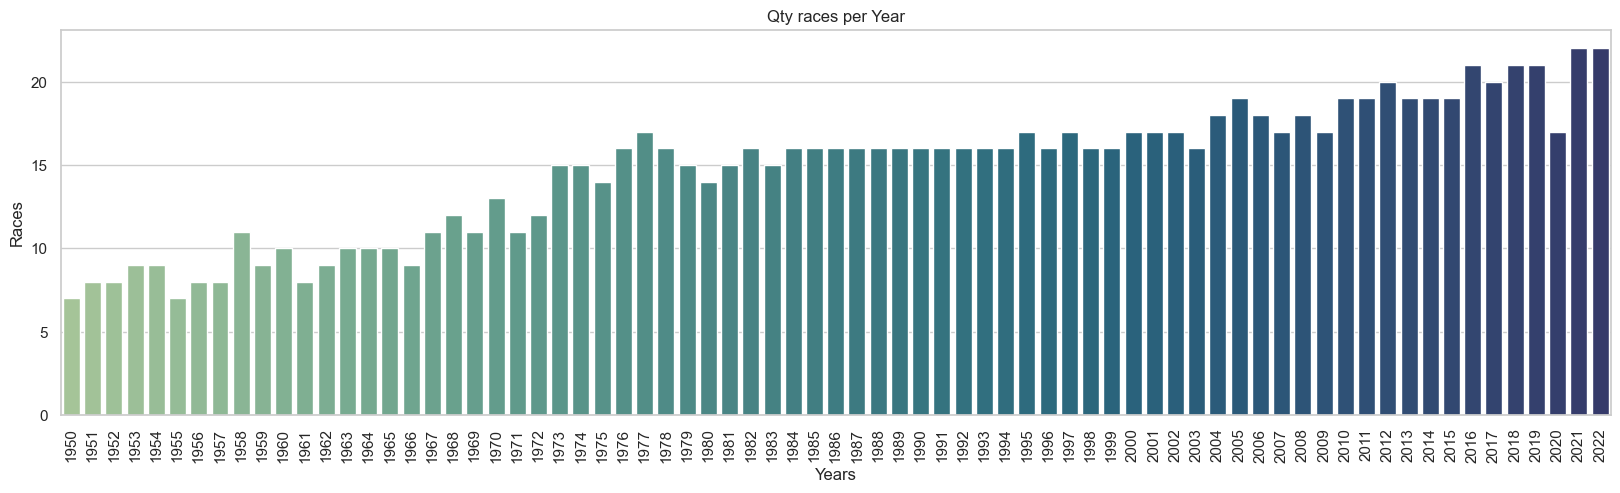

In [151]:
#Visualização da quantidade de Etapas por ano
sns.set_theme(style='whitegrid')
fig, axis = plt.subplots(1,1, figsize=(20, 5), sharex=True)

df_races_plot = df_races_cl['year'].value_counts().reset_index()
df_races_plot.columns = ['Year', 'Races']
df_races_plot.rename(columns={'Year' : 'Races'})
df_races_plot.sort_values(by=['Year'], inplace=True)
df_races_plot.sort_values(by=['Year'])

graph = sns.barplot(x=df_races_plot['Year'], y=df_races_plot['Races'], palette="crest")
graph.set(title='Qty races per Year', xlabel='Years', ylabel='Races')
graph.set_xticklabels(labels=graph.get_xticklabels(), rotation=90)

max = df_races_plot.describe() * 1.1
max_y = 0

_, max_y_f = graph.get_ylim()
max_y = max_y_f if max_y_f > max_y else max_y
graph.set(ylim=(0, max_y))

fig.show()
df_races_plot.transpose()

### Total points per season
Visualization of the total points of each driver and team per season.

In [152]:
# Mudança dos valores de position e rank de Float para Int
float_to_int = lambda value: int(value)

test_values = [10.0, 55.0, 2.0, 6.0]
values_int = list(map(float_to_int, test_values))

print(test_values)
print(values_int)

[10.0, 55.0, 2.0, 6.0]
[10, 55, 2, 6]


In [153]:
df_results_cl.dtypes

raceId             int64
driverId           int64
constructorId      int64
position         float64
dtype: object

In [154]:
df_results_cl['position'] = df_results_cl['position'].apply(float_to_int)
#df_results_cl['rank'] = df_results_cl['rank'].apply(float_to_int)

In [155]:
df_results_cl.dtypes

raceId           int64
driverId         int64
constructorId    int64
position         int64
dtype: object

In [156]:
# Adição da coluna com quantidade de pontos

points = [1, 25, 18, 15, 12, 10, 8, 6, 4, 2, 1]
df_results_cl['points'] = 0
df_results_cl['year'] = 0

for index, result in df_results_cl.iterrows():
    result['points'] = points[result['position']]

for index, result in df_results_cl.iterrows():
    
    raceId = int(result['raceId'])
    year = int(df_races_cl[df_races_cl['raceId'] == raceId]['year'])
    result['year'] = year
        
df_results_cl

raceId  driverId  constructorId  position  points  year
0          18         1              1         1      25  2008
1          18         2              2         2      18  2008
2          18         3              3         3      15  2008
3          18         4              4         4      12  2008
4          18         5              1         5      10  2008
...       ...       ...            ...       ...     ...   ...
25645    1086       844              6         6       8  2022
25646    1086       846              1         7       6  2022
25647    1086         4            214         8       4  2022
25648    1086       839            214         9       2  2022
25649    1086        20            117        10       1  2022

[10431 rows x 6 columns]

In [157]:
# Criação da listagem de anos
def ColumnToList(dataframe, array):
    for n in dataframe.sort_values():
        if n not in array:
            array.append(n)

            
years = []
ColumnToList(df_races_cl['year'], years)            
print(years)

[1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]


In [158]:
# Criação do dataset de pilotos x anos x pontos que será utilizado nos próximos graficos
df_drivers_years_points = df_results_cl.filter(['driverId','constructorId','points','year'], axis=1)
points_drivers_array = []
points_teams_array=[]

for year in years:
    
    points_year = df_drivers_years_points[df_drivers_years_points['year'] == year]
    for index, driver in df_drivers_cl.iterrows():
        
        array = []
        driver_name = f'''{driver['forename']} {driver['surname']}'''
        array.extend([driver_name, driver['code']])
        array.append(year)
        array.append(points_year[points_year['driverId'] == driver['driverId']].sum()['points'])
        points_drivers_array.append(array)
    
    for index, team in df_teams_cl.iterrows():
        
        array = []
        array.extend([team['name'], year])
        array.append(points_year[points_year['constructorId'] == team['constructorId']].sum()['points'])
        points_teams_array.append(array)

df_drivers_points = pd.DataFrame(points_drivers_array, columns=('name','code','year','points'))
df_teams_points = pd.DataFrame(points_teams_array, columns=('name','year','points'))

In [159]:
# Visualização do dataframe dos piltos. Ano alterável 

view_drivers = df_drivers_points[df_drivers_points['year'] == 2021]
view_drivers = view_drivers[view_drivers['points'] > 0]
view_drivers[view_drivers['year'] == 2021].sort_values(by=['points'], ascending=False)

name code  year  points
61463      Max Verstappen  VER  2021   396.0
60634      Lewis Hamilton  HAM  2021   387.0
61455     Valtteri Bottas  BOT  2021   216.0
61448        Sergio Pérez  PER  2021   189.0
61465        Carlos Sainz  SAI  2021   164.0
61476     Charles Leclerc  LEC  2021   161.0
61478        Lando Norris  NOR  2021   159.0
61450    Daniel Ricciardo  RIC  2021   119.0
61086        Pierre Gasly  GAS  2021   113.0
60637     Fernando Alonso  ALO  2021    81.0
61472        Esteban Ocon  OCO  2021    77.0
60653    Sebastian Vettel  VET  2021    48.0
61473        Lance Stroll  STR  2021    34.0
61484        Yuki Tsunoda  TSU  2021    32.0
61479      George Russell  RUS  2021    25.0
60641      Kimi Räikkönen  RAI  2021    10.0
61481     Nicholas Latifi  LAT  2021     8.0
61474  Antonio Giovinazzi  GIO  2021     3.0

In [160]:
# Visualização do dataframe das equipes. Altere o valor com o ano desejado.

view_teams = df_teams_points[df_teams_points['year'] == 2021]
view_teams = view_teams[view_teams['points'] > 0]
view_teams[view_teams['year'] == 2021].sort_values(by=['points'], ascending=False)

name  year  points
15110        Mercedes  2021   603.0
14989        Red Bull  2021   585.0
14986         Ferrari  2021   325.0
14981         McLaren  2021   278.0
15191  Alpine F1 Team  2021   158.0
15190      AlphaTauri  2021   145.0
15096    Aston Martin  2021    82.0
14983        Williams  2021    33.0
15030      Alfa Romeo  2021    13.0

In [161]:
# Criação dos gráficos
sns.set_theme(style='whitegrid')

axis = 0
max_y = 0
columns = 2
rows = int(len(years) / columns)
view, axes = plt.subplots(rows,columns, figsize=(30, 300), sharex=False)
plt.subplots_adjust(hspace = 0.8)
axes = axes.flatten()

for year in years:
    
    plot = df_drivers_points[df_drivers_points['year'] == year]
    plot = plot[plot['points'] > 0].sort_values(by=['points'], ascending=False, axis=0)
    
    fig = sns.barplot(x=plot['name'], y=plot['points'], ax=axes[axis], ci=None, palette="crest")
    fig.set(title=f'Standings of F1 {year}', xlabel='Drivers', ylabel='Points')
    fig.set_xticklabels(labels=fig.get_xticklabels(), rotation=90)
    
    axis += 1
    max = plot.describe() * 1.1
    
    _, max_y_f = fig.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    fig.set(ylim=(0, max_y))

    
view.show()

C:\Users\carol\AppData\Local\Temp\ipykernel_13060\3360649887.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  fig = sns.barplot(x=plot['name'], y=plot['points'], ax=axes[axis], ci=None, palette="crest")
C:\Users\carol\AppData\Local\Temp\ipykernel_13060\3360649887.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  fig = sns.barplot(x=plot['name'], y=plot['points'], ax=axes[axis], ci=None, palette="crest")
C:\Users\carol\AppData\Local\Temp\ipykernel_13060\3360649887.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  fig = sns.barplot(x=plot['name'], y=plot['points'], ax=axes[axis], ci=None, palette="crest")
C:\Users\carol\AppData\Local\Temp\ipykernel_13060\3360649887.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  fig = sns.barplot(x=plot['name'], y=plot['points'], ax=axes[axis], ci

C:\Users\carol\AppData\Local\Temp\ipykernel_13060\3360649887.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  fig = sns.barplot(x=plot['name'], y=plot['points'], ax=axes[axis], ci=None, palette="crest")
C:\Users\carol\AppData\Local\Temp\ipykernel_13060\3360649887.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  fig = sns.barplot(x=plot['name'], y=plot['points'], ax=axes[axis], ci=None, palette="crest")
C:\Users\carol\AppData\Local\Temp\ipykernel_13060\3360649887.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  fig = sns.barplot(x=plot['name'], y=plot['points'], ax=axes[axis], ci=None, palette="crest")
C:\Users\carol\AppData\Local\Temp\ipykernel_13060\3360649887.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  fig = sns.barplot(x=plot['name'], y=plot['points'], ax=axes[axis], ci

IndexError: index 72 is out of bounds for axis 0 with size 72

In [162]:
# Criação dos gráficos
sns.set_theme(style='whitegrid')

axis = 0
max_y = 0
columns = 2
rows = int(len(years) / columns)
view, axes = plt.subplots(rows,columns, figsize=(30, 300), sharex=False)
plt.subplots_adjust(hspace = 0.4)
axes = axes.flatten()

for year in years:
    
    plot = df_teams_points[df_teams_points['year'] == year]
    plot = plot[plot['points'] > 0].sort_values(by=['points'], ascending=False, axis=0)
    
    fig = sns.barplot(x=plot['name'], y=plot['points'], ax=axes[axis], ci=None, palette="crest")
    fig.set(title=f'Standings of F1 {year}', xlabel='Teams', ylabel='Points')
    fig.set_xticklabels(labels=fig.get_xticklabels(), rotation=90)
    
    axis += 1
    max = plot.describe() * 1.1
    
    _, max_y_f = fig.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    fig.set(ylim=(0, max_y))

    
view.show()

C:\Users\carol\AppData\Local\Temp\ipykernel_13060\4146676891.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  fig = sns.barplot(x=plot['name'], y=plot['points'], ax=axes[axis], ci=None, palette="crest")
C:\Users\carol\AppData\Local\Temp\ipykernel_13060\4146676891.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  fig = sns.barplot(x=plot['name'], y=plot['points'], ax=axes[axis], ci=None, palette="crest")
C:\Users\carol\AppData\Local\Temp\ipykernel_13060\4146676891.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  fig = sns.barplot(x=plot['name'], y=plot['points'], ax=axes[axis], ci=None, palette="crest")
C:\Users\carol\AppData\Local\Temp\ipykernel_13060\4146676891.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  fig = sns.barplot(x=plot['name'], y=plot['points'], ax=axes[axis], ci

C:\Users\carol\AppData\Local\Temp\ipykernel_13060\4146676891.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  fig = sns.barplot(x=plot['name'], y=plot['points'], ax=axes[axis], ci=None, palette="crest")
C:\Users\carol\AppData\Local\Temp\ipykernel_13060\4146676891.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  fig = sns.barplot(x=plot['name'], y=plot['points'], ax=axes[axis], ci=None, palette="crest")
C:\Users\carol\AppData\Local\Temp\ipykernel_13060\4146676891.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  fig = sns.barplot(x=plot['name'], y=plot['points'], ax=axes[axis], ci=None, palette="crest")
C:\Users\carol\AppData\Local\Temp\ipykernel_13060\4146676891.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  fig = sns.barplot(x=plot['name'], y=plot['points'], ax=axes[axis], ci

IndexError: index 72 is out of bounds for axis 0 with size 72

### Pontos totais
Calculos e gráficos da soma de todos os pontos de todos os anos.

In [164]:
#Preparação dos dataframes

teams_list = []
drivers_list = []

ColumnToList(df_teams_points['name'], teams_list)
ColumnToList(df_drivers_points['name'], drivers_list)

def TotalPoints(dataframe, column_name, list):
    array_df = []
    for n in list:
        
        array = []
        array.extend([n, dataframe[dataframe[column_name] == n].sum()['points']])
        array_df.append(array)
        
    return pd.DataFrame(array_df, columns=('name', 'points'))

df_total_teams_points = TotalPoints(df_teams_points, 'name', teams_list)
df_total_drivers_points = TotalPoints(df_drivers_points, 'name', drivers_list)

C:\Users\carol\AppData\Local\Temp\ipykernel_13060\3239730114.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  fig = sns.barplot(x=plot['name'], y=plot['points'], ax=axes[axis], ci=None, palette="crest")
C:\Users\carol\AppData\Local\Temp\ipykernel_13060\3239730114.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  fig = sns.barplot(x=plot['name'], y=plot['points'], ax=axes[axis], ci=None, palette="crest")
C:\Users\carol\AppData\Local\Temp\ipykernel_13060\3239730114.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  view.show()


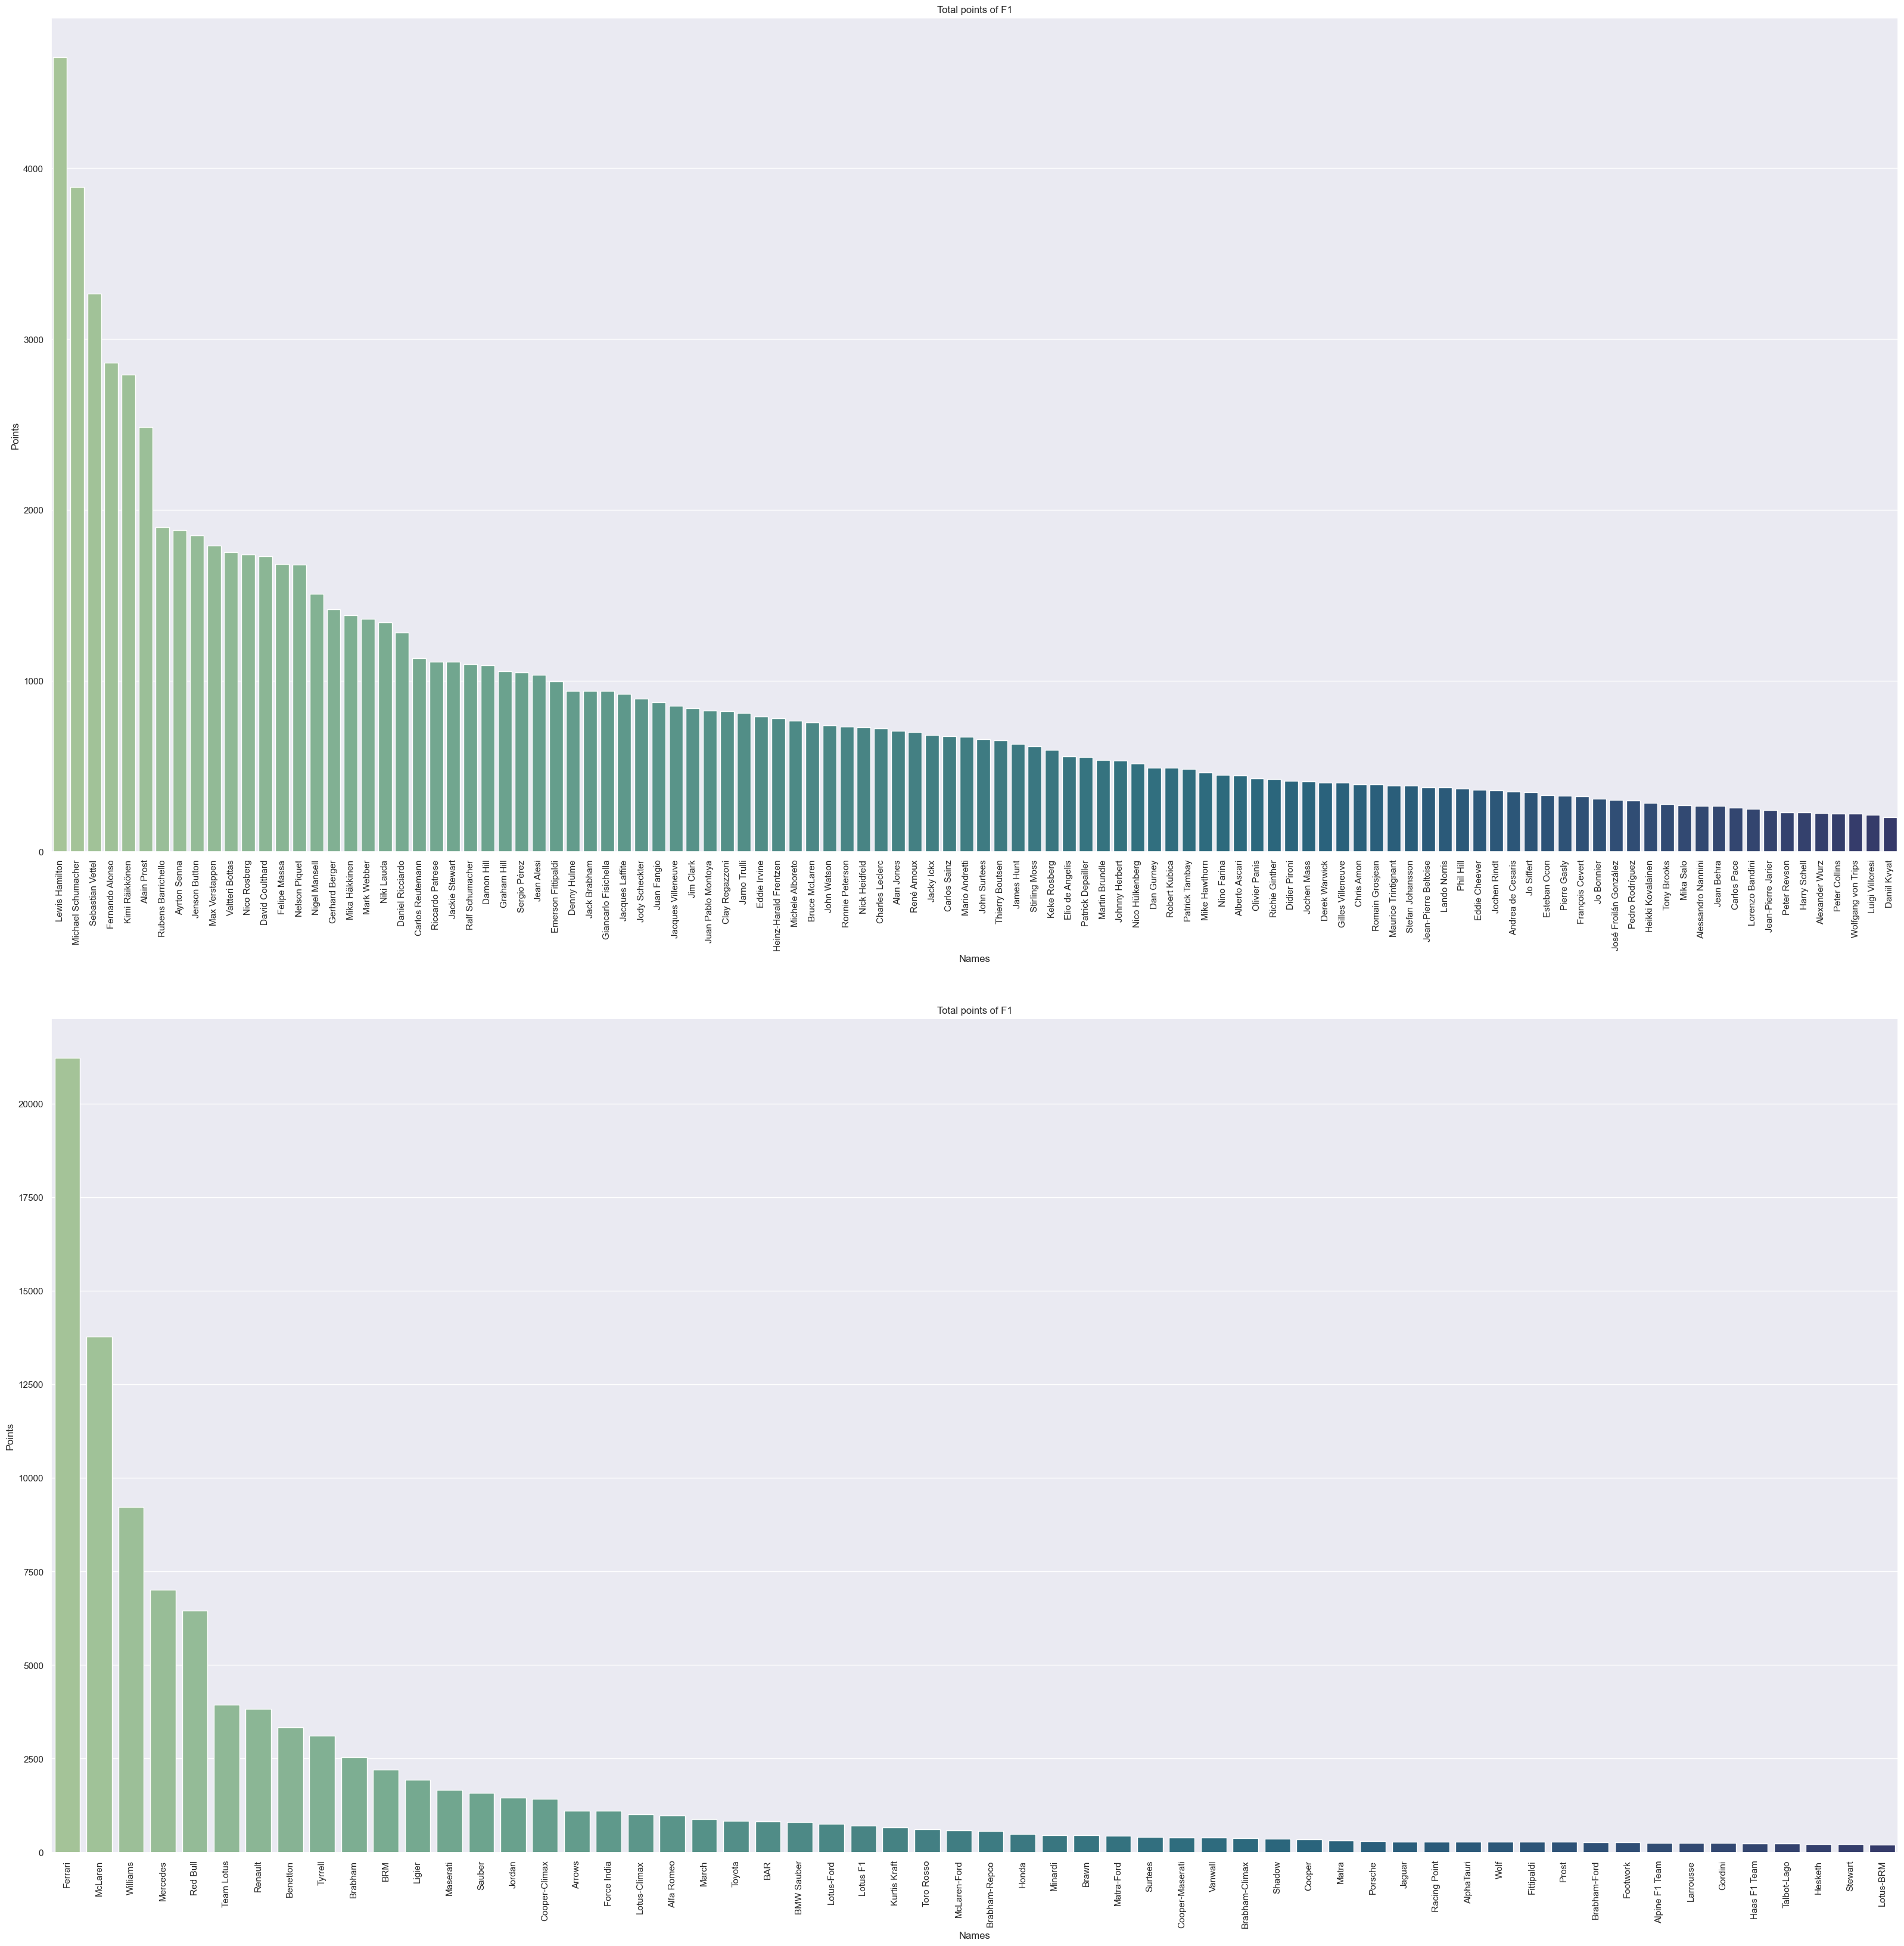

In [165]:
# Criação dos graficos

dataframes = [df_total_drivers_points, df_total_teams_points]
sns.set_theme(style='darkgrid')

axis = 0
max_y = 0
view, axes = plt.subplots(2,1, figsize=(40, 40), sharex=False)
plt.subplots_adjust(hspace = 0.2)
axes = axes.flatten()

for df in dataframes:
    
    plot = df[df['points'] > 200].sort_values(by=['points'], ascending=False, axis=0)
    
    fig = sns.barplot(x=plot['name'], y=plot['points'], ax=axes[axis], ci=None, palette="crest")
    fig.set(title=f'Total points of F1', xlabel='Names', ylabel='Points')
    fig.set_xticklabels(labels=fig.get_xticklabels(), rotation=90)
    
    
    axis += 1
    max = plot.describe() * 1.1
    
    _, max_y_f = fig.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    fig.set(ylim=(0, max_y))
    

    
view.show()


### Os 10 pilotos que mais pontuaram na F1, de 1950 a 2021:
    1. Lewis Hamilton - 4721,5
    2. Michael Schumacher - 3961
    3. Sebastian Vettel - 3303
    4. Kimi Raikkonen - 2901
    5. Fernando Alonso - 2830
    6. Alan Prost - 2508,5
    7. Rubens Barrichello - 1906
    8. Ayrton Senna - 1874,5
    9. Jenson Button - 1844,5
    10. Nico Rosberg - 1757

### Os 10 times que mais pontuaram na F1, de 1950 a 2021:
    1. Ferrari - 21215
    2. McLaren - 13765
    3. Williams - 9222
    4. Mercedes - 7004
    5. Red Bull - 6458
    6. Team Lotus - 3938
    7. Renault - 3825
    8. Benetton - 3333
    9. Tyrrell - 3105
    10. Brabham -2532